In [10]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from colicoords import Data, CellListPlot, IterCellPlot, AutoIterCellPlot, save, load, CellPlot
import os
import mahotas as mh
from addict import Dict
import pickle

In [2]:
import colicoords
colicoords.__file__

'C:\\Users\\jhs\\Programming\\cc_master\\colicoords\\__init__.py'

In [15]:
fnames = ['c41_01', 'c41_02', 'c41_03']

In [16]:
gd = Dict()

In [17]:
for f in fnames:
    gd[f].raw_cells = load(f + '_cell_raw.hdf5')
    gd[f].bin_cells = gd[f].raw_cells.copy()
    gd[f].res = gd[f].bin_cells.optimize_mp(processes=6)
    with open(f + '_res.pick', 'wb') as fh:
        pickle.dump(gd[f].res, fh)
    save(f + '_bin_full.hdf5', gd[f].bin_cells)

# C41 01

In [18]:
f = 'c41_01'

In [19]:
bn = ~np.equal([r for r in gd[f].res], None)
len(bn) - bn.sum()

0

In [20]:
gd[f].obj = np.array([r.objective_value for r in np.array(gd[f].res)[bn]])
gd[f].area = np.array([c.data.binary_img.sum() for c in gd[f].bin_cells[bn]])
ratio = gd[f].obj / gd[f].area

<IPython.core.display.Javascript object>


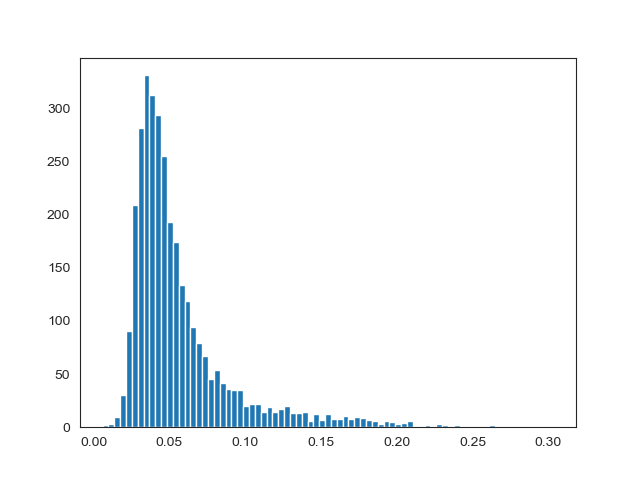

In [21]:
plt.figure()
h = plt.hist(ratio, bins='fd')

<IPython.core.display.Javascript object>


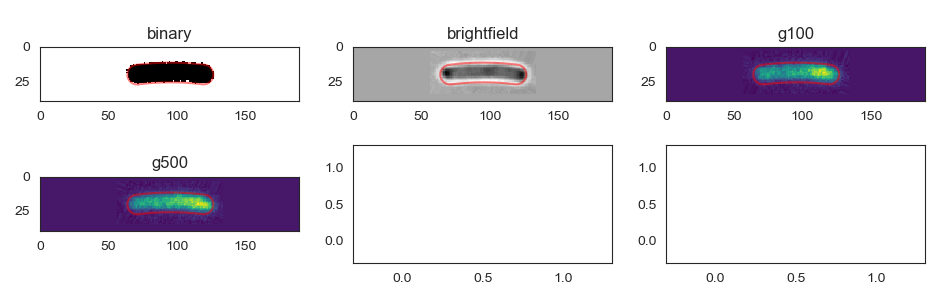

In [22]:
b = ratio < 0.1
aicp = AutoIterCellPlot(gd[f].bin_cells[bn][b])
aicp.plot()

In [23]:
gd[f].selected = gd[f].bin_cells[bn][b]

In [24]:
save(f + '_binary_opt.hdf5', gd[f].selected)

# C41 02

In [29]:
f = 'c41_02'

In [30]:
bn = ~np.equal(gd[f].res, None)
len(bn) - bn.sum()

0

In [31]:
gd[f].obj = np.array([r.objective_value for r in np.array(gd[f].res)[bn]])
gd[f].area = np.array([c.data.binary_img.sum() for c in gd[f].bin_cells[bn]])
ratio = gd[f].obj / gd[f].area

<IPython.core.display.Javascript object>


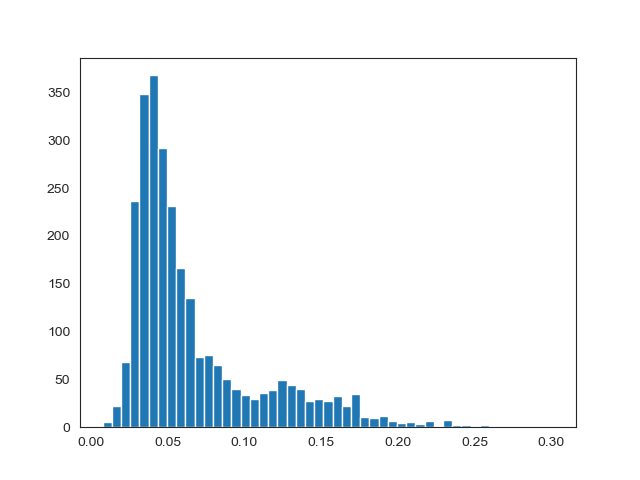

In [32]:
plt.figure()
h = plt.hist(ratio, bins='fd')

<IPython.core.display.Javascript object>


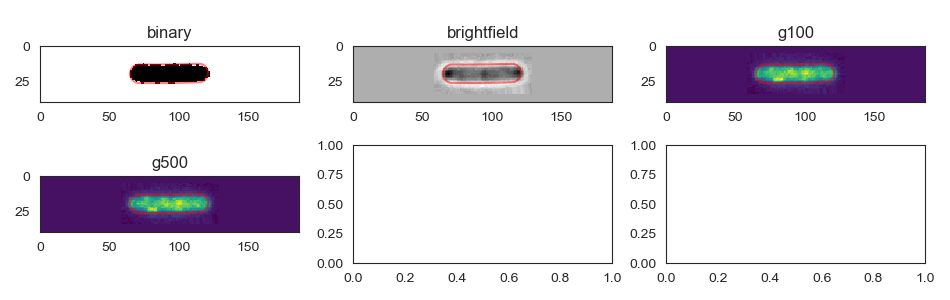

In [33]:
b = ratio < 0.1
aicp = AutoIterCellPlot(gd[f].bin_cells[bn][b])
aicp.plot()

In [34]:
gd[f].selected = gd[f].bin_cells[bn][b]

In [35]:
save(f + '_binary_opt.hdf5', gd[f].selected)

# C41 03

In [36]:
f = 'c41_03'

In [37]:
bn = ~np.equal(gd[f].res, None)
len(bn) - bn.sum()

0

In [38]:
gd[f].obj = np.array([r.objective_value for r in np.array(gd[f].res)[bn]])
gd[f].area = np.array([c.data.binary_img.sum() for c in gd[f].bin_cells[bn]])
ratio = gd[f].obj / gd[f].area

<IPython.core.display.Javascript object>


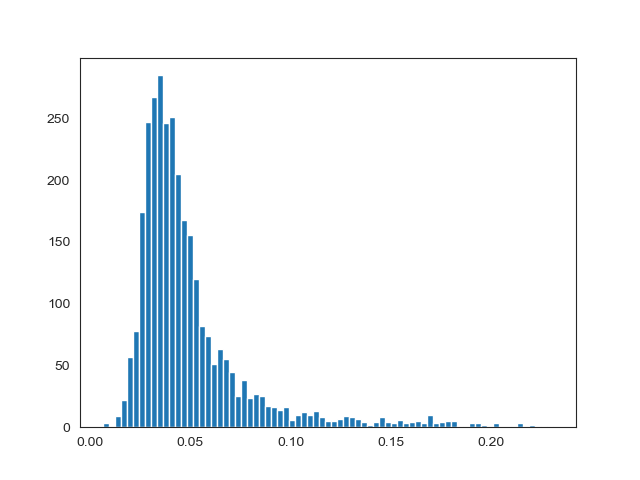

In [39]:
plt.figure()
h = plt.hist(ratio, bins='fd')

<IPython.core.display.Javascript object>


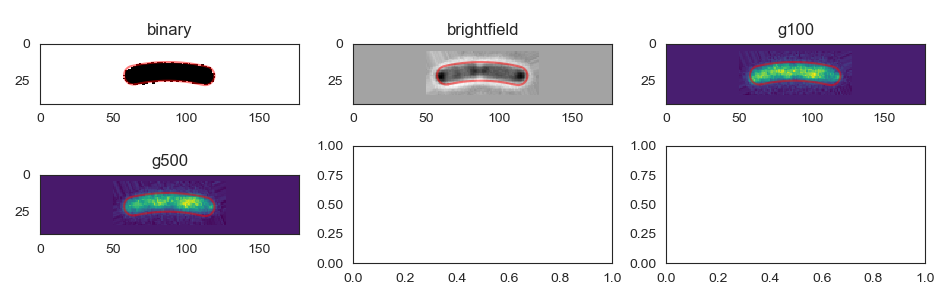

In [40]:
b = ratio < 0.1
aicp = AutoIterCellPlot(gd[f].bin_cells[bn][b])
aicp.plot()

In [41]:
gd[f].selected = gd[f].bin_cells[bn][b]

In [42]:
save(f + '_binary_opt.hdf5', gd[f].selected)